## Sequential

## 2Dense

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# 딥러닝 회귀 모델 정의 함수
def create_model():
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),  # L1 규제 추가
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),  # L1 규제 추가
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    return model

# 5-fold 교차 검증
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 모델 생성 및 학습
    model = create_model()
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # 예측 및 MAE 계산
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)

# 5-fold MAE 평균 출력
print(f'5-fold MAE: {np.mean(mae_scores):.4f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5-fold MAE: 12.6128


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 랜덤 시드 고정
np.random.seed(42)  # NumPy 랜덤 시드
tf.random.set_seed(42)  # TensorFlow 랜덤 시드

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 설정한 하이퍼파라미터
learning_rates = [0.001, 0.01, 0.1]  # 여러 learning rate
batch_sizes = [16, 32, 64]       # 여러 batch size

# 성능 비교를 위한 결과 저장
results = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# 다양한 learning rate와 batch size에 대해 성능 비교
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        mae_scores = []

        # 5-fold 교차 검증
        for train_index, val_index in kf.split(X_scaled):
            X_train, X_val = X_scaled[train_index], X_scaled[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # 모델 생성 및 학습
            model = create_model(learning_rate)

            # EarlyStopping 설정
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stopping])

            # 예측 및 MAE 계산
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            mae_scores.append(mae)

        # 평균 MAE 결과 저장
        mean_mae = np.mean(mae_scores)
        results.append((learning_rate, batch_size, mean_mae))
        print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, 5-fold MAE: {mean_mae:.4f}')

# 결과 출력
print("\nResults:")
for lr, bs, mae in results:
    print(f'Learning Rate: {lr}, Batch Size: {bs}, Mean MAE: {mae:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, 5-fold MAE: 12.6073
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.001, Batch Size: 32, 5-fold MAE: 12.5236
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.001, Batch Size: 64, 5-fold MAE: 12.6161
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.01, Batch Size: 16, 5-fold MA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 랜덤 시드 고정
np.random.seed(42)  # NumPy 랜덤 시드
tf.random.set_seed(42)  # TensorFlow 랜덤 시드

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 설정한 하이퍼파라미터
learning_rates = [0.001, 0.01, 0.1]  # 여러 learning rate
batch_sizes = [16, 32, 64]       # 여러 batch size

# 성능 비교를 위한 결과 저장
results = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# 다양한 learning rate와 batch size에 대해 성능 비교
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        mae_scores = []

        # 5-fold 교차 검증
        for train_index, val_index in kf.split(X_scaled):
            X_train, X_val = X_scaled[train_index], X_scaled[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # 모델 생성 및 학습
            model = create_model(learning_rate)

            # EarlyStopping 설정
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stopping])

            # 예측 및 MAE 계산
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            mae_scores.append(mae)

        # 평균 MAE 결과 저장
        mean_mae = np.mean(mae_scores)
        results.append((learning_rate, batch_size, mean_mae))
        print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, 5-fold MAE: {mean_mae:.4f}')

# 결과 출력
print("\nResults:")
for lr, bs, mae in results:
    print(f'Learning Rate: {lr}, Batch Size: {bs}, Mean MAE: {mae:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, 5-fold MAE: 12.6073
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.001, Batch Size: 32, 5-fold MAE: 12.5236
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.001, Batch Size: 64, 5-fold MAE: 12.6161
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.01, Batch Size: 16, 5-fold MA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 랜덤 시드 고정
np.random.seed(42)  # NumPy 랜덤 시드
tf.random.set_seed(42)  # TensorFlow 랜덤 시드

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 설정한 하이퍼파라미터
learning_rates = [0.001, 0.01, 0.1]  # 여러 learning rate
batch_sizes = [16, 32, 64]       # 여러 batch size

# 성능 비교를 위한 결과 저장
results = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# 다양한 learning rate와 batch size에 대해 성능 비교
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        mae_scores = []

        # 5-fold 교차 검증
        for train_index, val_index in kf.split(X_scaled):
            X_train, X_val = X_scaled[train_index], X_scaled[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # 모델 생성 및 학습
            model = create_model(learning_rate)

            # EarlyStopping 설정
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stopping])

            # 예측 및 MAE 계산
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            mae_scores.append(mae)

        # 평균 MAE 결과 저장
        mean_mae = np.mean(mae_scores)
        results.append((learning_rate, batch_size, mean_mae))
        print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, 5-fold MAE: {mean_mae:.4f}')

# 결과 출력
print("\nResults:")
for lr, bs, mae in results:
    print(f'Learning Rate: {lr}, Batch Size: {bs}, Mean MAE: {mae:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, 5-fold MAE: 12.6073
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.001, Batch Size: 32, 5-fold MAE: 12.5236
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.001, Batch Size: 64, 5-fold MAE: 12.6161
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Learning Rate: 0.01, Batch Size: 16, 5-fold MA

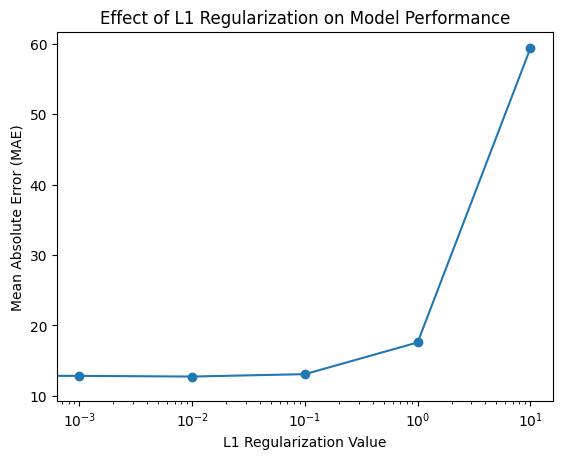

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Fix random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load data
train = pd.read_csv('./train.csv')
# Assuming test dataset does not include target column
test = pd.read_csv('./test_set.csv')

# Convert 'yymm' to datetime format (adding an arbitrary year)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')
test['yymm'] = pd.to_datetime('2024' + test['yymm'], format='%Y%m%d %H:%M')

# Extract day, hour, minute features
train['day'] = train['yymm'].dt.day
train['hour'] = train['yymm'].dt.hour
train['minute'] = train['yymm'].dt.minute
test['day'] = test['yymm'].dt.day
test['hour'] = test['yymm'].dt.hour
test['minute'] = test['yymm'].dt.minute

# Generate weekday feature
train['weekday'] = train['day'] % 7
test['weekday'] = test['day'] % 7

# Drop 'yymm' column
train.drop('yymm', axis=1, inplace=True)
test.drop('yymm', axis=1, inplace=True)

# Split into features and target
X = train.drop('Target', axis=1)
y = train['Target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate, l1_value):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l1(float(l1_value))),  # l1을 float 타입으로 변환
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(float(l1_value))),  # l1을 float 타입으로 변환
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# Hyperparameters and L1 values to test
learning_rate = 0.01
batch_size = 32
l1_values = [0, 0.001, 0.01, 0.1, 1.0, 10.0]  # Different L1 values
results = []

# Train models with different L1 values and collect MAE
for l1_value in l1_values:
    model = create_model(learning_rate, l1_value)
    early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_scaled, y, epochs=100, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

    # Collect the final training loss (MAE) for this l1_value
    final_mae = history.history['loss'][-1]
    results.append((l1_value, final_mae))

# Plotting the results
l1_values, mae_values = zip(*results)
plt.plot(l1_values, mae_values, marker='o')
plt.xlabel('L1 Regularization Value')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Effect of L1 Regularization on Model Performance')
plt.xscale('log')  # Log scale for better visualization
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 regularization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Fix random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test_set.csv')

# Convert 'yymm' to datetime format (adding an arbitrary year)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')
test['yymm'] = pd.to_datetime('2024' + test['yymm'], format='%Y%m%d %H:%M')

# Extract day, hour, minute features
train['day'] = train['yymm'].dt.day
train['hour'] = train['yymm'].dt.hour
train['minute'] = train['yymm'].dt.minute

test['day'] = test['yymm'].dt.day
test['hour'] = test['yymm'].dt.hour
test['minute'] = test['yymm'].dt.minute

# Generate weekday feature
train['weekday'] = train['day'] % 7
test['weekday'] = test['day'] % 7

# Drop 'yymm' column
train.drop('yymm', axis=1, inplace=True)
test.drop('yymm', axis=1, inplace=True)

# Split into features and target
columns = ['V2', 'V14', 'V20']
X = train.drop('Target', axis=1)
y = train['Target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어 (크기 축소)
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# Set hyperparameters
learning_rate = 0.001
batch_size = 32

# Create the model
model = create_model(learning_rate)

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model on the entire dataset without validation split
model.fit(X_scaled, y, epochs=100, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

# Make predictions on the test data
test_pred = model.predict(X_test_scaled)

# Generate submission file
submission = pd.DataFrame(test_pred, columns=['predict'])
submission.to_csv('submission.csv', index=False)
print(submission.head())


Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 29.4766
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26.5327
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.9374
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18.9881
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16.4801
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15.2468
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.7318
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.5219
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4723
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.0884
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2285
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.0781
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.9726
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.9564
Epoch 15/100
140/140 ━━━━━━━━

### 3 Dense

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model():
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(128, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어: 뉴런 수 증가
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),   # 뉴런 수 증가
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # 뉴런 수 증가
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
    return model

# 5-fold 교차 검증
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 모델 생성 및 학습
    model = create_model()
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # 예측 및 MAE 계산
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)

# 5-fold MAE 평균 출력
print(f'5-fold MAE: {np.mean(mae_scores):.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5-fold MAE: 12.6021


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 랜덤 시드 고정
np.random.seed(42)  # NumPy 랜덤 시드
tf.random.set_seed(42)  # TensorFlow 랜덤 시드

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 설정한 하이퍼파라미터
learning_rates = [0.001, 0.01, 0.1]  # 여러 learning rate
batch_sizes = [16, 32, 64]       # 여러 batch size

# 성능 비교를 위한 결과 저장
results = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(128, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# 다양한 learning rate와 batch size에 대해 성능 비교
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        mae_scores = []

        # 5-fold 교차 검증
        for train_index, val_index in kf.split(X_scaled):
            X_train, X_val = X_scaled[train_index], X_scaled[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # 모델 생성 및 학습
            model = create_model(learning_rate)

            # EarlyStopping 설정
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stopping])

            # 예측 및 MAE 계산
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            mae_scores.append(mae)

        # 평균 MAE 결과 저장
        mean_mae = np.mean(mae_scores)
        results.append((learning_rate, batch_size, mean_mae))
        print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, 5-fold MAE: {mean_mae:.4f}')

# 결과 출력
print("\nResults:")
for lr, bs, mae in results:
    print(f'Learning Rate: {lr}, Batch Size: {bs}, Mean MAE: {mae:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, 5-fold MAE: 12.5329
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Learning Rate: 0.001, Batch Size: 32, 5-fold MAE: 12.5277
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 64, 5-fold MAE: 12.5826
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.01, Batch Size: 16, 5-fold MA

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

# 랜덤 시드 고정
np.random.seed(42)
tf.random.set_seed(42)

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day
train['hour'] = train['yymm'].dt.hour
train['minute'] = train['yymm'].dt.minute

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
X = train.drop('Target', axis=1)
y = train['Target']

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 설정한 하이퍼파라미터
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
penalties = [0.01, 0.1, 0.5, 1]
drop_outs = [0.3, 0.5]

# 성능 비교를 위한 결과 저장
results = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate, penalty, drop_out):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l1(penalty)),
        BatchNormalization(),
        Dropout(drop_out),
        Dense(64, activation='relu', kernel_regularizer=l1(penalty)),
        BatchNormalization(),
        Dropout(drop_out),
        Dense(32, activation='relu', kernel_regularizer=l1(penalty)),
        BatchNormalization(),
        Dropout(drop_out),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# 다양한 learning rate, batch size, penalty, dropout에 대해 성능 비교
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        for penalty in penalties:
            for drop_out in drop_outs:
                mae_scores = []

                # 5-fold 교차 검증
                for train_index, val_index in kf.split(X_scaled):
                    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
                    y_train, y_val = y[train_index], y[val_index]

                    # 모델 생성 및 학습
                    model = create_model(float(learning_rate), float(penalty), float(drop_out))


                    # EarlyStopping 설정
                    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                    model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val),
                              verbose=0, callbacks=[early_stopping])

                    # 예측 및 MAE 계산
                    y_pred = model.predict(X_val)
                    mae = mean_absolute_error(y_val, y_pred)
                    mae_scores.append(mae)

                # 평균 MAE 결과 저장
                mean_mae = np.mean(mae_scores)
                results.append((learning_rate, batch_size, penalty, drop_out, mean_mae))
                print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, Penalty: {penalty}, '
                      f'Dropout: {drop_out}, 5-fold MAE: {mean_mae:.4f}')

# 결과 출력
print("\nResults:")
for lr, bs, pen, drp, mae in results:
    print(f'Learning Rate: {lr}, Batch Size: {bs}, Penalty: {pen}, Dropout: {drp}, Mean MAE: {mae:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, Penalty: 0.01, Dropout: 0.3, 5-fold MAE: 12.5146
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, Penalty: 0.01, Dropout: 0.5, 5-fold MAE: 12.5451
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 16, Penalty: 0.1, Dropout: 0.3, 5-fold MAE: 12.5384
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 정규화 임포트

# 랜덤 시드 고정
np.random.seed(42)  # NumPy 랜덤 시드
tf.random.set_seed(42)  # TensorFlow 랜덤 시드

# 데이터 로드
train = pd.read_csv('./train.csv')

# yymm 컬럼을 날짜 형식으로 변환 (연도는 임의로 설정)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')

# day, hour, minute 컬럼 생성
train['day'] = train['yymm'].dt.day         # 일
train['hour'] = train['yymm'].dt.hour       # 시
train['minute'] = train['yymm'].dt.minute   # 분

# weekday 컬럼 생성
train['weekday'] = train['day'] % 7         # 요일 (0: 월요일, 1: 화요일, ..., 6: 일요일)

# yymm 컬럼 삭제
train.drop('yymm', axis=1, inplace=True)

# 데이터 분할
columns = ['V2', 'V7', 'V11', 'V14', 'V20', 'V21', 'Target']
X = train.drop(columns = columns)    # Target을 제외한 모든 컬럼을 X로 지정
y = train['Target']                 # Target 컬럼을 y로 지정

# 특징 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-fold cross-validation 설정 (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 설정한 하이퍼파라미터
learning_rates = [0.001, 0.01]  # 여러 learning rate
batch_sizes = [16, 32, 64]       # 여러 batch size

# 성능 비교를 위한 결과 저장
results = []

# 딥러닝 회귀 모델 정의 함수 (DNN)
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),  # Input layer로 input shape 지정
        Dense(128, activation='relu', kernel_regularizer=l1(0.01)),  # DNN 레이어
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),   # DNN 레이어
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # 회귀 모델이므로 활성화 함수 없이 출력
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# 다양한 learning rate와 batch size에 대해 성능 비교
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        mae_scores = []

        # 5-fold 교차 검증
        for train_index, val_index in kf.split(X_scaled):
            X_train, X_val = X_scaled[train_index], X_scaled[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # 모델 생성 및 학습
            model = create_model(learning_rate)

            # EarlyStopping 설정
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val),verbose=0, callbacks=[early_stopping])

            # 예측 및 MAE 계산
            y_pred = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_pred)
            mae_scores.append(mae)

        # 평균 MAE 결과 저장
        mean_mae = np.mean(mae_scores)
        results.append((learning_rate, batch_size, mean_mae))
        print(f'Learning Rate: {learning_rate}, Batch Size: {batch_size}, 5-fold MAE: {mean_mae:.4f}')

# 결과 출력
print("\nResults:")
for lr, bs, mae in results:
    print(f'Learning Rate: {lr}, Batch Size: {bs}, Mean MAE: {mae:.4f}')


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Learning Rate: 0.001, Batch Size: 16, 5-fold MAE: 12.5226
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Learning Rate: 0.001, Batch Size: 32, 5-fold MAE: 12.5216
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Learning Rate: 0.001, Batch Size: 64, 5-fold MAE: 12.5062
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Learning Rate: 0.01, Batch Size: 16, 5-fold MA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 regularization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Fix random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test_set.csv')

# Convert 'yymm' to datetime format (adding an arbitrary year)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')
test['yymm'] = pd.to_datetime('2024' + test['yymm'], format='%Y%m%d %H:%M')

# Extract day, hour, minute features
train['day'] = train['yymm'].dt.day
train['hour'] = train['yymm'].dt.hour
train['minute'] = train['yymm'].dt.minute

test['day'] = test['yymm'].dt.day
test['hour'] = test['yymm'].dt.hour
test['minute'] = test['yymm'].dt.minute

# Generate weekday feature
train['weekday'] = train['day'] % 7
test['weekday'] = test['day'] % 7

# Drop 'yymm' column
train.drop('yymm', axis=1, inplace=True)
test.drop('yymm', axis=1, inplace=True)

# Split into features and target
columns = ['']
X = train.drop('Target', axis=1)
y = train['Target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)

# Define the DNN model for regression
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# Set hyperparameters
learning_rate = 0.01
batch_size = 32

# Create the model
model = create_model(learning_rate)

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model on the entire dataset without validation split
model.fit(X_scaled, y, epochs=100, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

# Make predictions on the test data
test_pred = model.predict(X_test_scaled)

# Generate submission file
submission = pd.DataFrame(test_pred, columns=['predict'])
submission.to_csv('submission.csv', index=False)
print(submission.head())


Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 28.7296
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17.9779
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 16.4685
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16.0187
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15.0634
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.4083
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.2020
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13.8331
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.7286
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.4055
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.3337
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.1867
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.2507
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.2120
Epoch 15/100
140/140 ━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 regularization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Fix random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test_set.csv')

# Convert 'yymm' to datetime format (adding an arbitrary year)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')
test['yymm'] = pd.to_datetime('2024' + test['yymm'], format='%Y%m%d %H:%M')

# Extract day, hour, minute features
train['day'] = train['yymm'].dt.day
train['hour'] = train['yymm'].dt.hour
train['minute'] = train['yymm'].dt.minute

test['day'] = test['yymm'].dt.day
test['hour'] = test['yymm'].dt.hour
test['minute'] = test['yymm'].dt.minute

# Generate weekday feature
train['weekday'] = train['day'] % 7
test['weekday'] = test['day'] % 7

# Drop 'yymm' column
train.drop('yymm', axis=1, inplace=True)
test.drop('yymm', axis=1, inplace=True)

# Split into features and target
X = train.drop('Target', axis=1)
y = train['Target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test)

# Define the DNN model for regression
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# Set hyperparameters
learning_rate = 0.01
batch_size = 64

# Create the model
model = create_model(learning_rate)

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model on the entire dataset without validation split
model.fit(X_scaled, y, epochs=100, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

# Make predictions on the test data
test_pred = model.predict(X_test_scaled)

# Generate submission file
submission = pd.DataFrame(test_pred, columns=['predict'])
submission.to_csv('submission.csv', index=False)
print(submission.head())


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 31.1712
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18.1303
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.5869
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.2886
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5712
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.1483
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9482
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.4562
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.3669
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.9408
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.7222
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.5494
Epoch 13/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.5810
Epoch 14/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6811
Epoch 15/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1  # L1 regularization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Fix random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test_set.csv')

# Convert 'yymm' to datetime format (adding an arbitrary year)
train['yymm'] = pd.to_datetime('2024' + train['yymm'], format='%Y%m%d %H:%M')
test['yymm'] = pd.to_datetime('2024' + test['yymm'], format='%Y%m%d %H:%M')

# Extract day, hour, minute features
train['day'] = train['yymm'].dt.day
train['hour'] = train['yymm'].dt.hour
train['minute'] = train['yymm'].dt.minute

test['day'] = test['yymm'].dt.day
test['hour'] = test['yymm'].dt.hour
test['minute'] = test['yymm'].dt.minute

# Generate weekday feature
train['weekday'] = train['day'] % 7
test['weekday'] = test['day'] % 7

# Drop 'yymm' column
train.drop('yymm', axis=1, inplace=True)
test.drop('yymm', axis=1, inplace=True)

# Split into features and target
X = train.drop('Target', axis=1)
y = train['Target']

# Define the DNN model for regression
def create_model(learning_rate):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# Set hyperparameters
learning_rate = 0.01
batch_size = 64

# Create the model
model = create_model(learning_rate)

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Train the model on the entire dataset without validation split
model.fit(X, y, epochs=100, batch_size=batch_size, verbose=1, callbacks=[early_stopping])

# Make predictions on the test data
test_pred = model.predict(test)

# Generate submission file
submission = pd.DataFrame(test_pred, columns=['predict'])
submission.to_csv('submission.csv', index=False)
print(submission.head())


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30.0766
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0913
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9871
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0179
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5100
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1026
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0664
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5273
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4480
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.1738
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9921
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.8135
Epoch 13/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.7390
Epoch 14/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.5493
Epoch 15/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los